<a href="https://colab.research.google.com/github/nicoataiza/CS7318/blob/main/Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# !pip3 install --upgrade pandas

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
col_names = ['Target','Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigree','Age']
df = pd.read_csv(r'/content/drive/MyDrive/Uni of Adelaide/CS7318/Assignment 1/indian_diabetes_scaled.csv',header=None,names=col_names,index_col=False)

In [5]:
df.columns

Index(['Target', 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'DiabetesPedigree', 'Age'],
      dtype='object')

In [6]:
for col in df.columns[1:]:
  df[col] = df[col].apply(lambda x: float(x[2:]) if type(x) == str else float('NaN'))

In [7]:
# Change the values: replace the value of no diabetes to 0 instead of -1.
df['Target'] = df['Target'].replace(-1,0)

In [8]:
df.head()

,Target,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigree,Age
0,0,-0.294118,0.487437,0.180328,-0.292929,-1.000000,0.001490,-0.531170,-0.033333
1,1,-0.882353,-0.145729,0.081967,-0.414141,-1.000000,-0.207153,-0.766866,-0.666667
2,0,-0.058824,0.839196,0.049180,-1.000000,-1.000000,-0.305514,-0.492741,-0.633333
3,1,-0.882353,-0.105528,0.081967,-0.535354,-0.777778,-0.162444,-0.923997,-1.000000
4,0,-1.000000,0.376884,-0.344262,-0.292929,-0.602837,0.284650,0.887276,-0.600000


In [9]:
df.dtypes

Target                int64
Pregnancies         float64
Glucose             float64
BloodPressure       float64
SkinThickness       float64
Insulin             float64
BMI                 float64
DiabetesPedigree    float64
Age                 float64
dtype: object

In [10]:
df.shape

(768, 9)

In [11]:
df.Target.value_counts()

1    500
0    268
Name: Target, dtype: int64

[Text(0, 0, '268'), Text(0, 0, '500')]

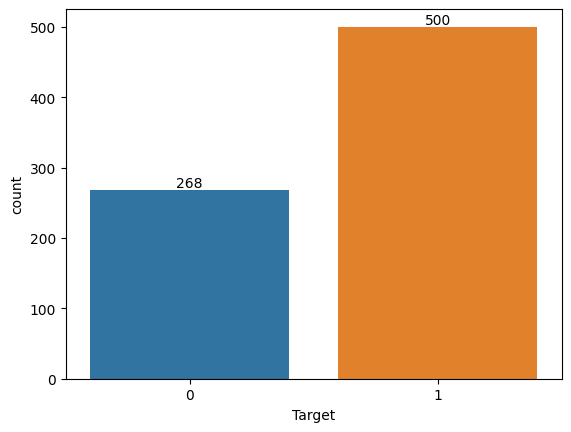

In [12]:
ax = sns.countplot(x=df.Target)

# Taken from https://stackoverflow.com/questions/49044131/how-to-add-data-labels-to-seaborn-countplot-factorplot
abs_values = df.Target.value_counts(ascending=True).values
ax.bar_label(container=ax.containers[0], labels=abs_values)

Based on how the data is codified, Target = 1 pertains to having no diabetes, and Target = 0 pertains to having diabetes.

# Check for missing Data

In [13]:
df.isna().sum()

Target              0
Pregnancies         0
Glucose             0
BloodPressure       0
SkinThickness       0
Insulin             0
BMI                 0
DiabetesPedigree    0
Age                 9
dtype: int64

We have missing data. 9 instances of the feature Age is missing. Given that, the missing data only comprises 1.17% of our dataset. We will drop the rows with missing data.

# Dropping the rows with missing data

In [14]:
df.dropna(inplace=True)

In [15]:
df.shape

(759, 9)

[Text(0, 0, '263'), Text(0, 0, '496')]

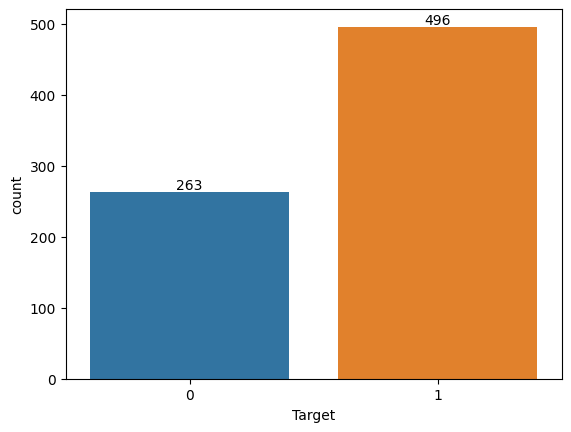

In [16]:
ax = sns.countplot(x=df.Target)

# Taken from https://stackoverflow.com/questions/49044131/how-to-add-data-labels-to-seaborn-countplot-factorplot
abs_values = df.Target.value_counts(ascending=True).values
ax.bar_label(container=ax.containers[0], labels=abs_values)

Of the missing data, 5 belong to class 0 and 4 belong to class 1.

# Splitting Dataset

I opted to use KFold here since the dataset only has 759 instances. We will do a train-test split with a proportion of of 80-20. Additionally, we will stratify the target for the model to learn about both classes since one is underrepresented.

In [17]:
from sklearn.model_selection import train_test_split
import numpy as np

In [18]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y,random_state=0,train_size = 0.80)

# Using Linear Classifiers to predict diabetes

In [20]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [21]:
def evaluate_model(clf,
                   X_train,
                   y_train,
                   X_test,
                   y_test):
  clf.fit(X_train,y_train)
  print('Training data metrics')
  print('---------------------')
  y_train_pred = clf.predict(X_train)
  print('accuracy:', accuracy_score(y_train,y_train_pred))
  print('precision:', precision_score(y_train,y_train_pred))
  print('recall:', precision_score(y_train,y_train_pred))
  print('f1:', f1_score(y_train,y_train_pred))
  print()
  y_pred = clf.predict(X_test)

  print('Test data metrics')
  print('---------------------')
  print('accuracy:', accuracy_score(y_test,y_pred))
  print('precision:', precision_score(y_test,y_pred))
  print('recall:', precision_score(y_test,y_pred))
  print('f1:', f1_score(y_test,y_pred))

## Logistic Regression

For Logistic Regression, the scikit-learn library has a function specifically for Logistic Regression using cross-validation

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
evaluate_model(LogisticRegression(random_state=0), X_train,y_train,X_test,y_test)

Training data metrics
---------------------
accuracy: 0.7792421746293245
precision: 0.7981859410430839
recall: 0.7981859410430839
f1: 0.8400954653937949

Test data metrics
---------------------
accuracy: 0.7697368421052632
precision: 0.7666666666666667
recall: 0.7666666666666667
f1: 0.8401826484018264


## Support Vector Machines

In [24]:
from sklearn.svm import SVC

In [25]:
evaluate_model(SVC(random_state=0),X_train,y_train,X_test,y_test)

Training data metrics
---------------------
accuracy: 0.8056013179571664
precision: 0.8093126385809313
recall: 0.8093126385809313
f1: 0.8608490566037738

Test data metrics
---------------------
accuracy: 0.7828947368421053
precision: 0.7946428571428571
recall: 0.7946428571428571
f1: 0.8436018957345972


We see that SVMs slightly outperform Logistic Regression across all metrics. We can refer to this as our benchmark values to compare our neural networks to.

# Single Layer Perceptron

In [26]:
import torch
torch.manual_seed(8)
from torch.utils.data import DataLoader, TensorDataset

In [27]:
# Converting dataFrames into tensors
X_train = np.asarray(X_train).astype('float32')
X_test = np.asarray(X_test).astype('float32')
y_train = np.asarray(y_train).astype('float32').reshape((-1,1))
y_test = np.asarray(y_test).astype('float32').reshape((-1,1))

X_train_t = torch.from_numpy(X_train)
X_test_t = torch.from_numpy(X_test)
y_train_t = torch.from_numpy(y_train)
y_test_t = torch.from_numpy(y_test)

train_data_tensor = TensorDataset(X_train_t, y_train_t)
train_loader = DataLoader(train_data_tensor, batch_size=32, shuffle=True)

In [33]:
# https://medium.com/@shashankshankar10/introduction-to-neural-networks-build-a-single-layer-perceptron-in-pytorch-c22d9b412ccf
class SingleLayerNet(torch.nn.Module):
    def __init__(self, input_size):
        super(SingleLayerNet, self).__init__()
        self.input_layer = torch.nn.Linear(input_size, 1)

    #Define how forward
    def forward(self, x):
        y_pred = torch.sigmoid(self.input_layer(x))
        return y_pred

In [29]:
# create the model
model = SingleLayerNet(8)

In [30]:
# Define the loss function (criterion)
criterion = torch.nn.BCELoss()

# Create an optimizer (Stochastic Gradient Descent - SGD)
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

In [31]:
# Define the training loop
epochs = 500
for epoch in range(epochs):
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels.view(-1, 1))
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item()}')

Epoch [1/500], Loss: 0.7169412970542908
Epoch [2/500], Loss: 0.6571578979492188
Epoch [3/500], Loss: 0.7275374531745911
Epoch [4/500], Loss: 0.7002629637718201
Epoch [5/500], Loss: 0.6458228826522827
Epoch [6/500], Loss: 0.6259192228317261
Epoch [7/500], Loss: 0.6626232266426086
Epoch [8/500], Loss: 0.6809318661689758
Epoch [9/500], Loss: 0.7048397064208984
Epoch [10/500], Loss: 0.6498586535453796
Epoch [11/500], Loss: 0.6573231816291809
Epoch [12/500], Loss: 0.6431094408035278
Epoch [13/500], Loss: 0.6351858973503113
Epoch [14/500], Loss: 0.6907500624656677
Epoch [15/500], Loss: 0.6611171960830688
Epoch [16/500], Loss: 0.7283551096916199
Epoch [17/500], Loss: 0.6886494159698486
Epoch [18/500], Loss: 0.6775212287902832
Epoch [19/500], Loss: 0.6350677609443665
Epoch [20/500], Loss: 0.6537355184555054
Epoch [21/500], Loss: 0.6676154732704163
Epoch [22/500], Loss: 0.7134689092636108
Epoch [23/500], Loss: 0.6830090880393982
Epoch [24/500], Loss: 0.6888450384140015
Epoch [25/500], Loss: 0.6

In [32]:
model.eval()
with torch.no_grad():
    y_pred = model(X_test_t)
    y_pred = (y_pred >= 0.5).float()
    accuracy = (y_pred == y_test_t.view(-1, 1)).float().mean()
    print(f'Accuracy on test set: {accuracy.item()}')

Accuracy on test set: 0.6447368264198303


Our single layer perceptron has a test accuracy of 76.97%

